## 과제.
타이타닉 생존자 예측모델 개발을 위한 전처리 및 통계적 시각적 탐색을 통하여 최적의 분석용 데이터셋을 작성하세요.

#### Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
    - Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
    - 불필요한 속성 칼럼 삭제
    - 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수 

#### 컬럼 정보

- survived : 생존여부(1: 생존, 0 : 사망)
- pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동반한 형제자매, 배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat
- body
- home.dest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataSet/titanic3.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [16]:
import re

# 정규표현식 패턴
pattern = r',\s*([\w\s]+)\.'

# Name 컬럼(column)에서 호칭(prefix)을 추출하여 새로운 컬럼(column) Title에 저장
df['Title'] = df['name'].str.extract(pattern)[0]

# 결과 확인
print(df['Title'].value_counts())


Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: Title, dtype: int64


In [17]:
def get_ct(parch):
    cat = ""
    if parch != 0: cat = "o"
    else: cat = "x"
    return cat
        
df["parch_cat"] = df["parch"].apply(lambda x : get_ct(x))

In [24]:
a = df[["Title","sex","survived","parch_cat"]].groupby(["Title"])
a.mean()

,survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dona,1.000000
Dr,0.500000
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.508197


In [27]:
df.dropna(axis = 1, thresh = 800, inplace = True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Title,parch_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,Miss,x
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,Master,o
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,Miss,o
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,Mr,o
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,Mrs,o
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C,Miss,x
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,Miss,x
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,C,Mr,x
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,C,Mr,x


In [28]:
df["age"].fillna(df["age"].mean(), inplace = True)

In [30]:
df.embarked.replace(np.nan, 'C', inplace=True)

In [31]:
df.fillna("N", inplace = True)

In [32]:
df.drop(["ticket"], axis =1, inplace = True)

In [34]:
def age_cat(age) :
    
    cat = ''
    
    if age <= 10 : cat = '1'
    elif age <= 28 : cat = '2'
    elif age <= 32 : cat = '3'
    elif age <= 50 : cat = '4'
    else : cat = '5'
    
    return cat

df['age_cat'] = df.age.apply(lambda x: age_cat(x))
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title,parch_cat,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,211.3375,S,Miss,x,3
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,151.55,S,Master,o,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,151.55,S,Miss,o,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,151.55,S,Mr,o,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,151.55,S,Mrs,o,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,14.4542,C,Miss,x,2
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,14.4542,C,Miss,x,3
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,7.225,C,Mr,x,2
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,7.225,C,Mr,x,2


In [35]:
df.drop(["name"], axis = 1, inplace =True)

In [36]:
df['family'] = ((df['sibsp'] != 0) | (df['parch'] != 0)).astype(int)

In [40]:
#df.drop("age", axis = 1, inplace = True)

In [38]:
df["fare"].replace("N",np.nan, inplace = True)
df["fare"].fillna(df["fare"].mean(), inplace = True)

In [18]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,parch_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,x
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,o
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,o
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,o
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Miss,x
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Miss,x
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Mr,x
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Mr,x


<AxesSubplot:xlabel='fare', ylabel='Count'>

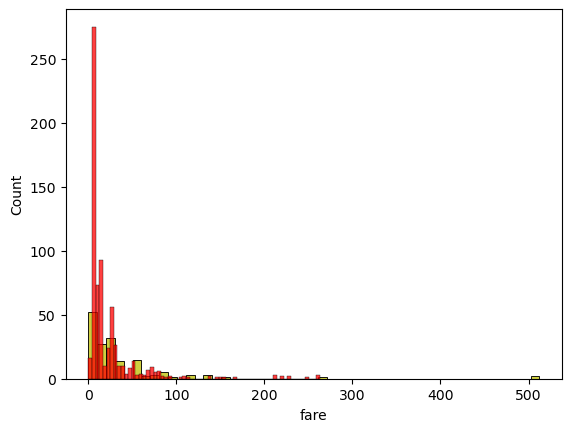

In [54]:
a = df[(df.survived == 1) & (df.sex == "female")]["fare"]
b = df[(df.survived == 1) & (df.sex == "male")]["fare"]
c = df[(df.survived == 0) & (df.sex == "female")]["fare"]
d = df[(df.survived == 0) & (df.sex == "male")]["fare"]

#sns.histplot(a, color = "b") # 생존 여자
sns.histplot(b, color = "y") # 생존 남자
#sns.histplot(c, color = "green") # 사망 여자
sns.histplot(d, color = "r") # 사망 남자


<AxesSubplot:xlabel='pclass', ylabel='Count'>

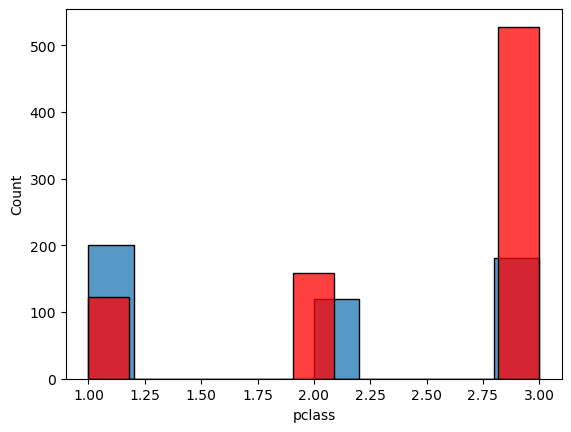

In [20]:
a = df[df.survived == 1]["pclass"]
b = df[df.survived == 0]["pclass"]

sns.histplot(a)
sns.histplot(b, color = "r")

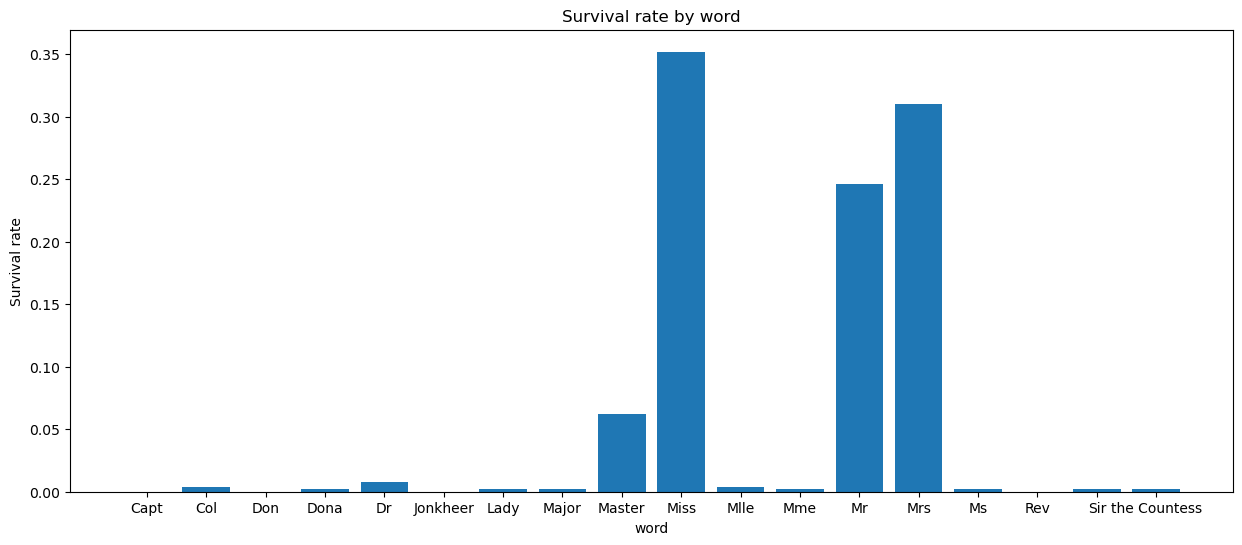

In [66]:
plt.figure(figsize = (15, 6))

word_survived = df.groupby('Title')['survived'].sum()
total_survived = df['survived'].sum()
word_survival_rate = word_survived / total_survived

plt.bar(word_survival_rate.index, word_survival_rate.values)

plt.xlabel('word')
plt.ylabel('Survival rate')
plt.title('Survival rate by word')

plt.show()

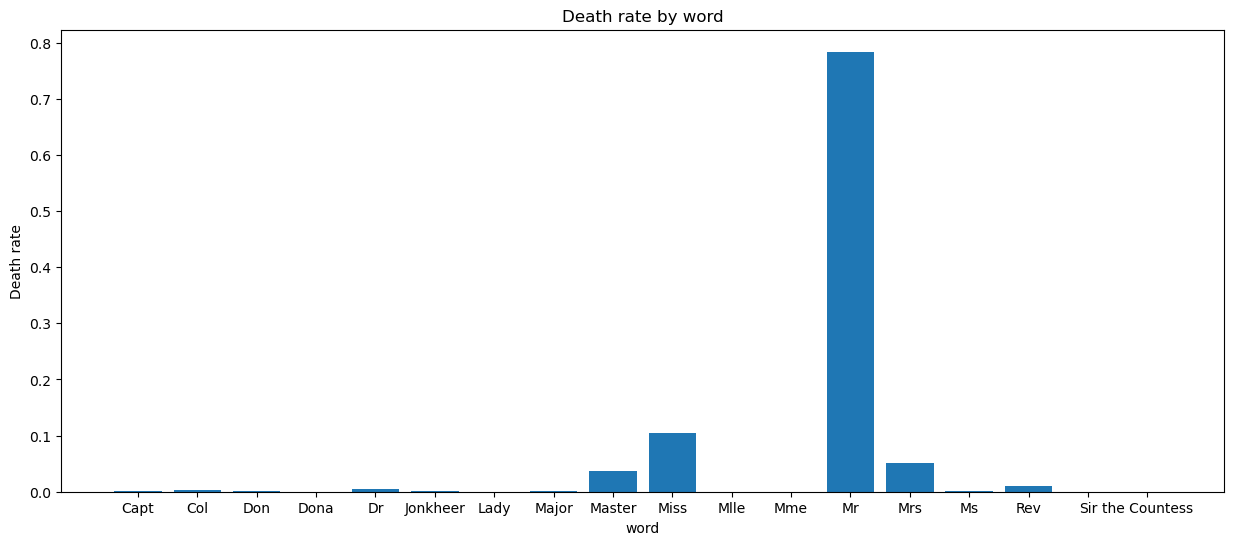

In [67]:
plt.figure(figsize = (15, 6))

word_dead = df.groupby('Title')['survived'].count() - word_survived
total_dead = df['survived'].count() - total_survived
word_death_rate = word_dead / total_dead

plt.bar(word_death_rate.index, word_death_rate.values)

plt.xlabel('word')
plt.ylabel('Death rate')
plt.title('Death rate by word')

plt.show()

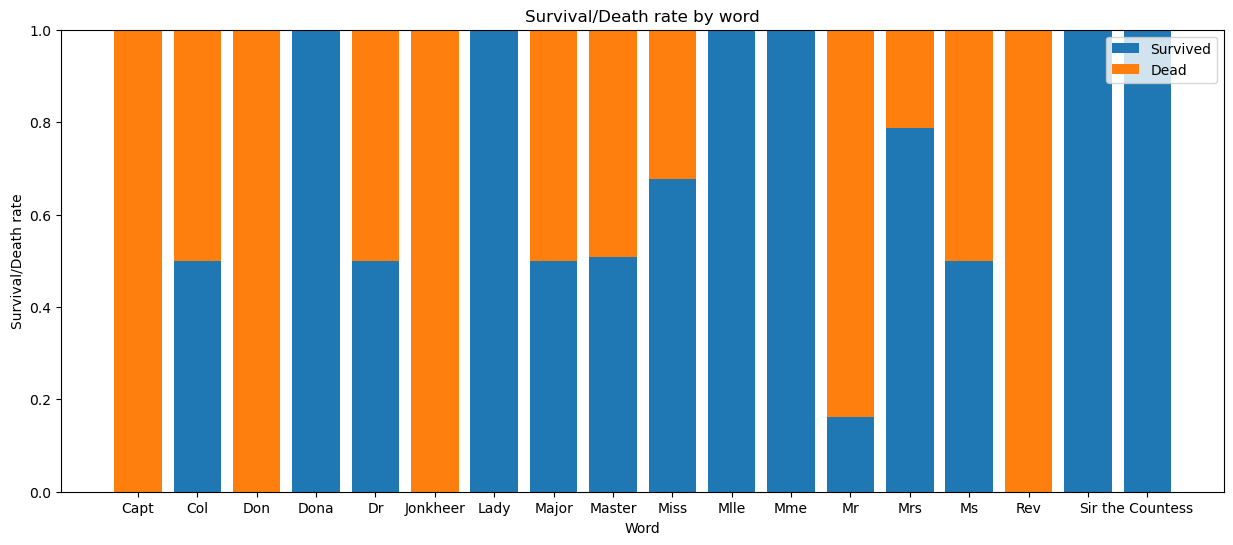

In [64]:
plt.figure(figsize = (15, 6))

word_survived = df.groupby('Title')['survived'].sum()
word_dead = df.groupby('Title')['survived'].count() - word_survived
word_total = word_survived + word_dead
word_survival_rate = word_survived / word_total
word_death_rate = word_dead / word_total

# 그래프를 그림
plt.bar(word_survival_rate.index, word_survival_rate.values, label='Survived')
plt.bar(word_death_rate.index, word_death_rate.values, bottom=word_survival_rate.values, label='Dead')

plt.xlabel('Word')
plt.ylabel('Survival/Death rate')
plt.title('Survival/Death rate by word')
plt.legend()

plt.show()

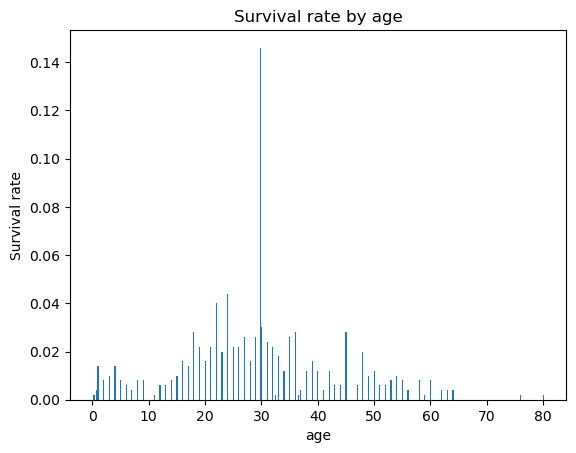

In [55]:
age_survived = df.groupby('age')['survived'].sum()
total_survived = df['survived'].sum()
age_survival_rate = age_survived / total_survived

plt.bar(age_survival_rate.index, age_survival_rate.values, width = 0.2)

plt.xlabel('age')
plt.ylabel('Survival rate')
plt.title('Survival rate by age')

plt.show()

<AxesSubplot:xlabel='parch_cat', ylabel='survived'>

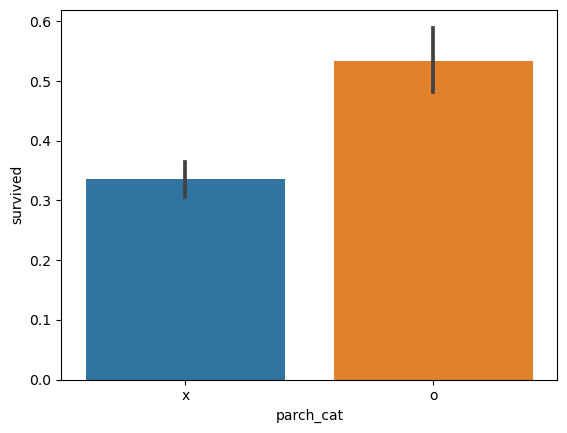

In [52]:
sns.barplot(data = df, x = "parch_cat", y = "survived")

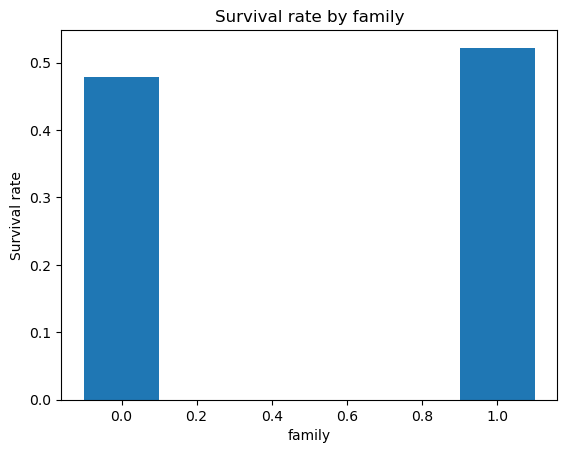

In [60]:
family_survived = df.groupby('family')['survived'].sum()
total_survived = df['survived'].sum()
family_survival_rate = family_survived / total_survived

plt.bar(family_survival_rate.index, family_survival_rate.values, width = 0.2)

plt.xlabel('family')
plt.ylabel('Survival rate')
plt.title('Survival rate by family')

plt.show()

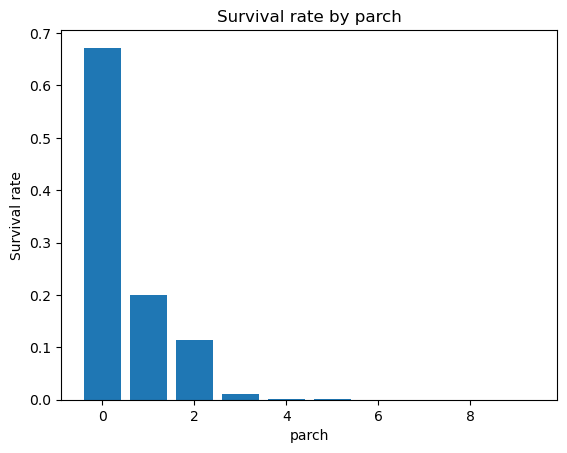

In [61]:
parch_survived = df.groupby('parch')['survived'].sum()
total_survived = df['survived'].sum()
parch_survival_rate = parch_survived / total_survived

plt.bar(parch_survival_rate.index, parch_survival_rate.values)

plt.xlabel('parch')
plt.ylabel('Survival rate')
plt.title('Survival rate by parch')

plt.show()

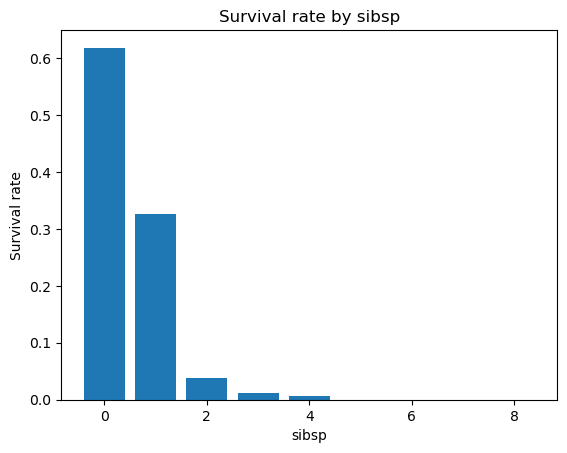

In [62]:
sibsp_survived = df.groupby('sibsp')['survived'].sum()
total_survived = df['survived'].sum()
sibsp_survival_rate = sibsp_survived / total_survived

plt.bar(sibsp_survival_rate.index, sibsp_survival_rate.values)

plt.xlabel('sibsp')
plt.ylabel('Survival rate')
plt.title('Survival rate by sibsp')

plt.show()

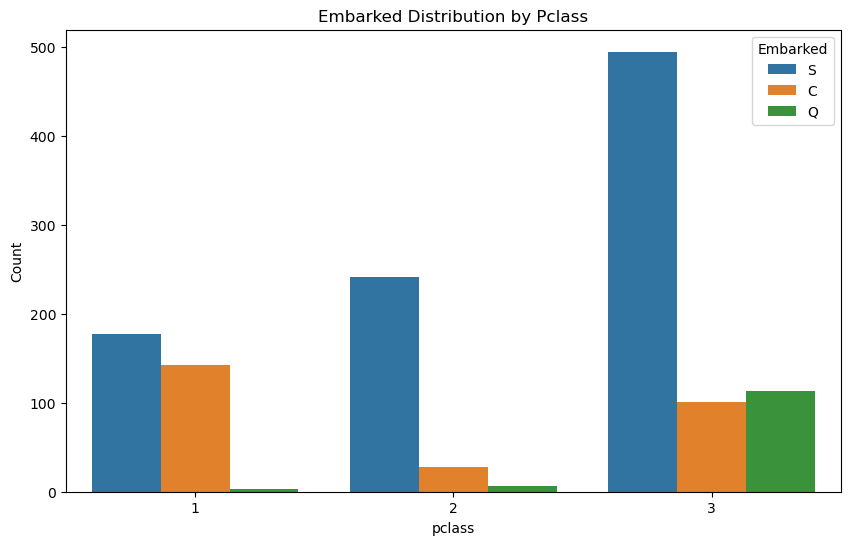

In [57]:
df['pclass'] = df['pclass'].astype(str)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pclass', hue='embarked')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.title('Embarked Distribution by Pclass')
plt.legend(title='Embarked')
plt.show()

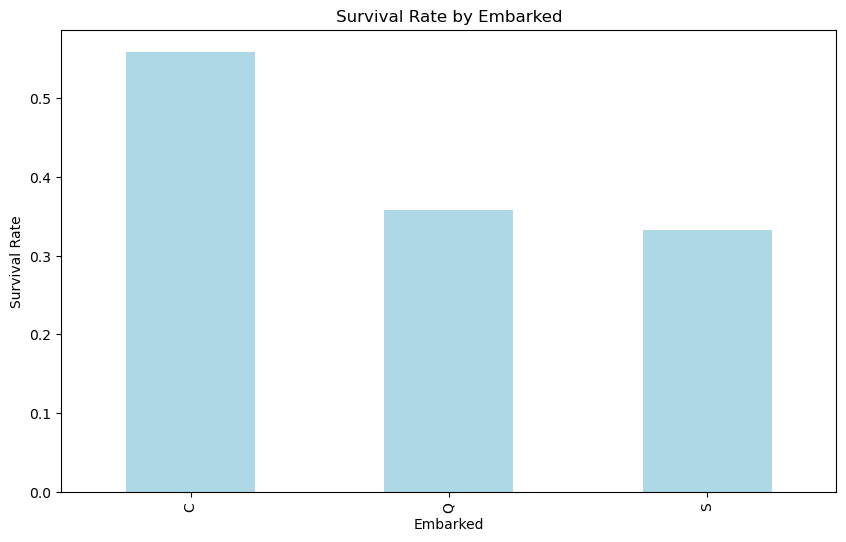

In [58]:
# "embarked" 값별 생존 여부 계산
embarked_survival = df.groupby('embarked')['survived'].mean()

# 그래프 설정
plt.figure(figsize=(10, 6))
embarked_survival.plot(kind='bar', color='lightblue')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarked')

# 그래프 출력
plt.show()

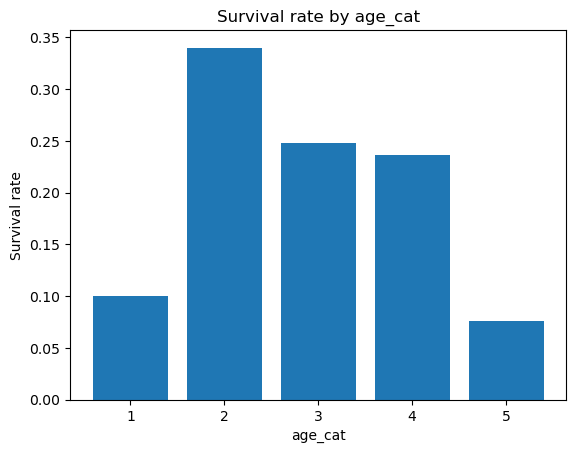

In [59]:
age_cat_survived = df.groupby('age_cat')['survived'].sum()
total_survived = df['survived'].sum()
age_cat_survival_rate = age_cat_survived / total_survived

plt.bar(age_cat_survival_rate.index, age_cat_survival_rate.values)

plt.xlabel('age_cat')
plt.ylabel('Survival rate')
plt.title('Survival rate by age_cat')

plt.show()

In [22]:
a = df[["Title","survived","parch_cat"]].groupby(["Title","parch_cat"])
a.mean()

survived
Title        parch_cat          
Capt         o          0.000000
Col          x          0.500000
Don          x          0.000000
Dona         x          1.000000
Dr           o          1.000000
             x          0.428571
Jonkheer     x          0.000000
Lady         x          1.000000
Major        x          0.500000
Master       o          0.508475
             x          0.500000
Miss         o          0.639535
             x          0.695402
Mlle         x          1.000000
Mme          x          1.000000
Mr           o          0.169014
             x          0.161808
Mrs          o          0.758621
             x          0.809091
Ms           x          0.500000
Rev          o          0.000000
             x          0.000000
Sir          x          1.000000
the Countess x          1.000000

In [23]:
a = df[["sex","survived","parch_cat"]].groupby(["sex","parch_cat"])
a.mean()

survived
sex    parch_cat          
female o          0.699422
       x          0.744027
male   o          0.320896
       x          0.166432

In [43]:
titanic_df = df

In [44]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   object 
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   fare       1309 non-null   float64
 7   embarked   1309 non-null   object 
 8   Title      1309 non-null   object 
 9   parch_cat  1309 non-null   object 
 10  age_cat    1309 non-null   object 
 11  family     1309 non-null   int32  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 117.7+ KB


In [45]:
# One-Hot Encoding
titanic_df = pd.get_dummies(titanic_df, columns=['pclass'])
titanic_df = pd.get_dummies(titanic_df, columns=['sex'])
titanic_df = pd.get_dummies(titanic_df, columns=['embarked'])
titanic_df = pd.get_dummies(titanic_df, columns=['parch_cat'])
titanic_df = pd.get_dummies(titanic_df, columns=['age_cat'])
titanic_df = pd.get_dummies(titanic_df, columns=['family'])
titanic_df = pd.get_dummies(titanic_df, columns=['Title'])

titanic_df.head(3)

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,29.00,0,0,211.3375,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0.92,1,2,151.5500,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,2.00,1,2,151.5500,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [46]:
# 분석용 데이터 셋
titanic_df.to_pickle('dataSet/tdf.pkl')
titanic_df = pd.read_pickle('dataSet/tdf.pkl')

In [47]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = titanic_df['survived'] # 종속변수
X_t_df = titanic_df.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)


(1047, 39)
(262, 39)


In [48]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.81, lr 정확도:0.82


C:\Users\h\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
